# King County Housing
#### House Price Estimate

**Authors:** Hatice Kastan, Czarina Luna, Ross McKim, Weston Shuken

##### January 2022

***

![image](Images/daria-nepriakhina-LZkbXfzJK4M-unsplash.jpg)

## Overview

    Overview of our project.

## Business Problem

    Stakeholder is a real estate company.
    Business Problem is predicting price and building a house price calculator.

## Data Understanding
    Describe the data being used for this project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
raw_data = pd.read_csv('Data/kc_house_data.csv')

In [3]:
raw_data.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639


## Data Cleaning
    Describe and justify the process for preparing the data for analysis.

In [4]:
# Data prep and cleaning

# Change to datetime and add month column
raw_data['date'] = pd.to_datetime(raw_data['date'])
raw_data['month'] = pd.DatetimeIndex(raw_data['date']).month

# Change waterfront missing value to No
raw_data.loc[raw_data.waterfront.isnull(), 'waterfront'] = "NO"

# Change view missing value to None
raw_data.loc[raw_data.view.isnull(), 'view'] = "NONE"

# Change condition to numerical value
cond_dict = {'Poor':0, 'Fair':1, 'Average':2, 'Good':3, 'Very Good':4}
raw_data['condition'].replace(cond_dict, inplace=True)

# Change grade to numerical value
raw_data['grade'] = raw_data['grade'].map(lambda x: int(x.split(' ')[0]))

# Add has_basement column
raw_data['basement'] = raw_data['sqft_basement'].apply(lambda x: 0 if x == 0 else 1)

# Change some yr_renovated missing value to 0 and add renovated column
raw_data.loc[raw_data.yr_renovated.isnull(), 'yr_renovated'] = 0
raw_data['renovated'] = raw_data['yr_renovated'].apply(lambda x: 0 if x == 0 else 1)

# Add house_age column
raw_data['age'] = raw_data['date'].dt.year - raw_data['yr_built']

In [5]:
def corr_check(df, threshold):
    '''
    Enter dataframe and threshold for correlation
    Returns table of the highly correlated pairs
    '''
    corr_df = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)
    corr_df['pairs'] = list(zip(corr_df.level_0, corr_df.level_1))
    corr_df.set_index(['pairs'], inplace = True)
    corr_df.drop(columns=['level_1', 'level_0'], inplace = True)
    corr_df.columns = ['cc']
    corr_df = corr_df.drop_duplicates()
    corr_df = corr_df[(corr_df['cc'] > threshold) & (corr_df['cc'] < 1)]
    return corr_df

corr_check(raw_data, .7)

,cc
pairs,
"(renovated, yr_renovated)",0.999968
"(age, yr_built)",0.999873
"(sqft_living, sqft_above)",0.876448
"(sqft_living, grade)",0.762779
"(sqft_living, sqft_living15)",0.756402
"(sqft_above, grade)",0.756073
"(sqft_living, bathrooms)",0.755758
"(sqft_living15, sqft_above)",0.731767
"(sqft_lot, sqft_lot15)",0.718204


In [6]:
# Drop columns
raw_data.drop(columns=['id', 'yr_renovated', 'sqft_above', 'sqft_basement',
                      'yr_built', 'yr_renovated'], inplace=True)

In [7]:
raw_data.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,lat,long,sqft_living15,sqft_lot15,month,basement,renovated,age
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NO,NONE,2,7,98178,47.5112,-122.257,1340,5650,10,1,0,59
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,2,7,98125,47.7210,-122.319,1690,7639,12,1,1,63


## Data Exploration
    Generate insights and visualizations about price and its relationships with variables.

In [8]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  object        
 8   view           21597 non-null  object        
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  zipcode        21597 non-null  int64         
 12  lat            21597 non-null  float64       
 13  long           21597 non-null  float64       
 14  sqft_living15  21597 non-null  int64         
 15  sqft_lot15     2159

In [9]:
raw_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,zipcode,lat,long,sqft_living15,sqft_lot15,month,basement,renovated,age
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.0,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,2.409825,7.657915,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,6.573969,1.0,0.034449,43.323286
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.650546,1.173200,53.513072,0.138552,0.140724,685.230472,27274.441950,3.115061,0.0,0.182384,29.377285
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,3.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,1.000000,1.0,0.000000,-1.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,2.000000,7.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,4.000000,1.0,0.000000,18.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,2.000000,7.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,6.000000,1.0,0.000000,40.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,3.000000,8.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,9.000000,1.0,0.000000,63.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,13.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,12.000000,1.0,1.000000,115.000000


In [10]:
#doing groupby of zip code to see variability within zip codes
zipgroup = raw_data.groupby("zipcode")
zipgroup.mean()
# 70 zip codes and we can see enormous differences between these 

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,lat,long,sqft_living15,sqft_lot15,month,basement,renovated,age
zipcode,,,,,,,,,,,,,,,,
98001,2.811949e+05,3.393352,2.011773,1903.783934,14967.002770,1.430748,2.335180,7.296399,47.309106,-122.270704,1830.099723,11218.875346,6.567867,1.0,0.011080,33.454294
98002,2.342840e+05,3.326633,1.839196,1627.743719,7517.633166,1.334171,2.743719,6.693467,47.308780,-122.213357,1479.030151,7585.482412,6.698492,1.0,0.025126,46.562814
98003,2.941113e+05,3.357143,2.047321,1928.882143,10603.096429,1.310714,2.371429,7.542857,47.315741,-122.310054,1876.196429,9746.178571,6.621429,1.0,0.007143,37.457143
98004,1.356524e+06,3.854890,2.527603,2909.022082,13104.220820,1.432177,2.495268,8.687697,47.616183,-122.205189,2674.700315,12805.022082,6.353312,1.0,0.088328,42.867508
98005,8.102897e+05,3.851190,2.424107,2656.803571,19928.785714,1.279762,2.696429,8.488095,47.611532,-122.167268,2567.863095,18367.773810,6.922619,1.0,0.023810,44.553571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98177,6.764194e+05,3.396078,2.100000,2323.333333,11904.403922,1.276471,2.494118,7.976471,47.742381,-122.369282,2186.196078,11690.239216,6.564706,1.0,0.062745,53.447059
98178,3.106128e+05,3.305344,1.731870,1729.351145,8309.122137,1.185115,2.320611,6.816794,47.499118,-122.246969,1648.816794,8149.641221,6.885496,1.0,0.034351,59.061069
98188,2.890783e+05,3.433824,1.863971,1802.772059,10126.080882,1.227941,2.330882,7.036765,47.447310,-122.280993,1636.279412,9752.801471,6.205882,1.0,0.022059,48.882353


In [11]:
monthgroup = raw_data.groupby("month")
monthgroup.mean()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,zipcode,lat,long,sqft_living15,sqft_lot15,basement,renovated,age
month,,,,,,,,,,,,,,,,
1,525963.251534,3.387526,2.129346,2085.094070,17869.721881,1.478528,2.347648,7.642127,98077.897751,47.553500,-122.212188,1975.859918,12687.026585,1.0,0.029652,43.250511
2,508520.051323,3.347233,2.062550,2012.901363,13694.825180,1.466319,2.405774,7.558140,98076.716119,47.546850,-122.216140,1944.269447,11595.312751,1.0,0.023256,43.581395
3,544057.683200,3.367467,2.065333,2021.968533,15604.088533,1.464267,2.355733,7.588267,98077.578667,47.553377,-122.214041,1951.490133,12678.426133,1.0,0.036267,44.402667
4,562215.615074,3.367878,2.107896,2060.743831,14273.263795,1.495065,2.358905,7.651413,98078.967250,47.560614,-122.213484,1986.577389,12653.579632,1.0,0.027367,43.268730
5,550849.746893,3.363712,2.116508,2090.514913,16678.293289,1.486123,2.420464,7.674399,98079.094863,47.565075,-122.214854,1990.449876,13694.719553,1.0,0.043082,44.050953
6,557534.318182,3.421488,2.165863,2131.163912,14258.142792,1.512167,2.460514,7.736915,98079.596419,47.565513,-122.214423,2033.827824,12835.893939,1.0,0.033058,43.276400
7,544892.161013,3.391678,2.146540,2128.246495,13857.654907,1.522162,2.442786,7.716870,98074.758933,47.560198,-122.206664,2029.130710,12584.116689,1.0,0.036635,42.222976
8,536655.212481,3.357401,2.123388,2085.100567,14643.078391,1.499484,2.440433,7.685921,98077.033522,47.564750,-122.209769,1995.968025,12966.646209,1.0,0.033007,41.955647
9,529723.517787,3.365330,2.133117,2079.319593,15365.775833,1.491248,2.431959,7.644833,98078.513834,47.560654,-122.213067,1983.068888,11887.396951,1.0,0.042914,43.465839


In [12]:
import statsmodels.api as sm

### Baseline Model
    Run simple linear regression on feature highest correlated with price.

In [13]:
# alone, zip code is significant but shows only 0.003 contribution to R squared
mod2 = sm.formula.ols(formula= "price ~ zipcode", data = raw_data)
mod2_result = mod2.fit()
mod2_summ = mod2_result.summary()
mod2_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     61.76
Date:                Wed, 05 Jan 2022   Prob (F-statistic):           4.06e-15
Time:                        11:45:20   Log-Likelihood:            -3.0736e+05
No. Observations:               21597   AIC:                         6.147e+05
Df Residuals:                   21595   BIC:                         6.147e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    3.65e+07   4.58e+06      7.977      0.000    2.75e+07    4.55e+07
zipcode     -366.6086     46.649     -7.859      0.000    -458.045    -275.173
==============================================================================
Omnibus:                    19044.296   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1123391.740
Skew:                           4.004   Prob(JB):                         0.00
Kurtosis:                      37.413   Cond. No.                     1.80e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
# alone, zip code is significant but shows only 0.003 contribution to R squared
mod_bed = sm.formula.ols(formula= "price ~ bedrooms", data = raw_data)
mod_bed_result = mod_bed.fit()
mod_bed_summ = mod_bed_result.summary()
mod_bed_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     2276.
Date:                Wed, 05 Jan 2022   Prob (F-statistic):               0.00
Time:                        11:45:20   Log-Likelihood:            -3.0631e+05
No. Observations:               21597   AIC:                         6.126e+05
Df Residuals:                   21595   BIC:                         6.126e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.272e+05   8979.293     14.166      0.000     1.1e+05    1.45e+05
bedrooms    1.225e+05   2566.930     47.709      0.000    1.17e+05    1.27e+05
==============================================================================
Omnibus:                    18831.341   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1195104.832
Skew:                           3.900   Prob(JB):                         0.00
Kurtosis:                      38.598   Cond. No.                         14.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
# ols
mod1 = sm.formula.ols(formula= "price ~ sqft_living", data = raw_data)
mod1

In [16]:
mod1_result = mod1.fit()
mod1_result

In [17]:
mod1_summ = mod1_result.summary()
mod1_summ
#trying linear regression with one variable

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Wed, 05 Jan 2022   Prob (F-statistic):               0.00
Time:                        11:45:20   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
all_mod_summ = sm.formula.ols(formula='price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + waterfront + view + condition+ grade + month + basement + renovated + age + sqft_living15 + sqft_lot15', data= raw_data)
all_mod_summ

In [19]:
all_mod_result = all_mod_summ.fit()
all_mod_result

In [20]:
all_mod_summ = all_mod_result.summary()
all_mod_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     2429.
Date:                Wed, 05 Jan 2022   Prob (F-statistic):               0.00
Time:                        11:45:21   Log-Likelihood:            -2.9584e+05
No. Observations:               21597   AIC:                         5.917e+05
Df Residuals:                   21579   BIC:                         5.919e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -4.604e+05   9320.956    -49.394      0.000   -4.79e+05   -4.42e+05
waterfront[T.YES]  5.267e+05   2.18e+04     24.143      0.000    4.84e+05    5.69e+05
view[T.EXCELLENT]  2.347e+05   1.63e+04     14.408      0.000    2.03e+05    2.67e+05
view[T.FAIR]       5.586e+04   1.38e+04      4.059      0.000    2.89e+04    8.28e+04
view[T.GOOD]       5.926e+04   1.19e+04      4.997      0.000     3.6e+04    8.25e+04
view[T.NONE]      -4.956e+04   7302.035     -6.787      0.000   -6.39e+04   -3.52e+04
bedrooms          -3.941e+04   2028.805    -19.425      0.000   -4.34e+04   -3.54e+04
bathrooms          4.723e+04   3442.159     13.720      0.000    4.05e+04     5.4e+04
sqft_living         161.8632      3.580     45.209      0.000     154.845     168.881
sqft_lot              0.0039      0.051      0.076      0.940      -0.096       0.104
floors             2.597e+04   3429.200      7.572      0.000    1.92e+04    3.27e+04
condition          2.034e+04   2478.634      8.206      0.000    1.55e+04    2.52e+04
grade              1.206e+05   2239.525     53.832      0.000    1.16e+05    1.25e+05
month             -2285.0572    470.758     -4.854      0.000   -3207.777   -1362.337
basement          -4.604e+05   9320.956    -49.394      0.000   -4.79e+05   -4.42e+05
renovated          2.611e+04   8476.827      3.080      0.002    9493.488    4.27e+04
age                3607.6117     69.819     51.671      0.000    3470.762    3744.461
sqft_living15        23.4750      3.523      6.664      0.000      16.570      30.380
sqft_lot15           -0.5533      0.078     -7.085      0.000      -0.706      -0.400
==============================================================================
Omnibus:                    16278.151   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1193347.169
Skew:                           3.017   Prob(JB):                         0.00
Kurtosis:                      38.913   Cond. No.                     1.11e+22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.5e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [21]:
condition_mod = sm.formula.ols(formula= "price ~ condition", data = raw_data)
condition_mod


In [22]:
condition_mod_result = condition_mod.fit()
condition_mod_result


In [23]:
condition_mod_summ = condition_mod_result.summary()
condition_mod_summ
#each improvement in condition adds about $20000

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     28.11
Date:                Wed, 05 Jan 2022   Prob (F-statistic):           1.16e-07
Time:                        11:45:21   Log-Likelihood:            -3.0738e+05
No. Observations:               21597   AIC:                         6.148e+05
Df Residuals:                   21595   BIC:                         6.148e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.912e+05   9585.710     51.246      0.000    4.72e+05     5.1e+05
condition   2.036e+04   3840.295      5.302      0.000    1.28e+04    2.79e+04
==============================================================================
Omnibus:                    19113.390   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1136802.126
Skew:                           4.025   Prob(JB):                         0.00
Kurtosis:                      37.619   Cond. No.                         11.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
#trying to transform month into season
raw_data2 = raw_data
raw_data2 ["season"] = raw_data2["month"]

In [25]:
raw_data2["season"].rename({1: "Spring"})
#df.rename(index={0: "x", 1: "y", 2: "z"})
raw_data2.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,zipcode,lat,long,sqft_living15,sqft_lot15,month,basement,renovated,age,season
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.0,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,2.409825,7.657915,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,6.573969,1.0,0.034449,43.323286,6.573969
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.650546,1.173200,53.513072,0.138552,0.140724,685.230472,27274.441950,3.115061,0.0,0.182384,29.377285,3.115061
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,3.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,1.000000,1.0,0.000000,-1.000000,1.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,2.000000,7.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,4.000000,1.0,0.000000,18.000000,4.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,2.000000,7.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,6.000000,1.0,0.000000,40.000000,6.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,3.000000,8.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,9.000000,1.0,0.000000,63.000000,9.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,13.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,12.000000,1.0,1.000000,115.000000,12.000000


##### Model Metrics Table
    Create table of metrics we care about, and update with every additional model after.

In [26]:
# metric_df

In [ ]:
#Chart of Month coefficient as predicted change in value all else being equal

matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)

## Feature Engineering
    Create new variables to predict the price.

In [27]:
# code

### Feature Scaling
    Perform log transformation and standardization.

In [28]:
# StandardScaler and PowerTransformer

### Feature Selection
    Feature ranking with recursive feature elimination.

In [29]:
# RFE

## Data Modeling
    Describe and justify the process for modeling the data.
    Run multiple linear regression on top ranking features.

In [30]:
# OLS

#### Check Assumptions of Linear Regression
    Linearity, independence, normality, homoescadicity

In [31]:
# code

In [6]:
import matplotlib.pyplot as plt

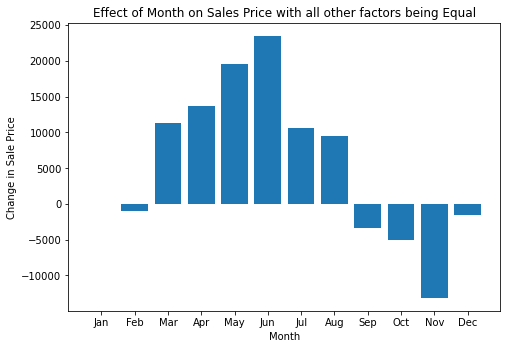

In [21]:
#Bar plot of effect of month on sale price from categorical model




fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Effect of Month on Sales Price with all other factors being Equal')
plt.ylabel("Change in Sale Price")
plt.xlabel("Month")
Month = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
Effect_on_Sale_Price = [0, -974, 11370, 13730, 19510, 23490, 10560, 9491, -3323, -4986, -13110, -1591]
ax.bar(Month, Effect_on_Sale_Price)
plt.show()